<a href="https://colab.research.google.com/github/NishiB7/ML_DL_NN/blob/main/CVProject1(1_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#ANN, CNN n SVM implementation, image classification from cifar10 dataset

In [2]:
pip install -q -U tensorflow_addons

     |████████████████████████████████| 1.1 MB 5.1 MB/s 


In [29]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
from sklearn import metrics
from sklearn.svm import SVC
import tensorflow_addons as tfa
import seaborn as sns

DATA EXPLORATION

In [9]:

(Xx_train, Yy_train), (Xx_test, Yy_test) = datasets.cifar10.load_data()


In [10]:
print(Xx_train.shape)
print(Yy_train.shape)
print(Xx_test.shape)
print(Yy_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [78]:
# we crop the dataset to be used, n this operation itself reshapes y_train to 1D array coz we dont need 2D
x_train=Xx_train[:10000]
y_train=Yy_train[:10000]
x_test=Xx_test[:500]
y_test=Yy_test[:500]

In [48]:
print("Yy_train.shape:", Yy_train.shape)
print("Xx_train.shape", Xx_train.shape)
print("Xx_test.shape", Xx_test.shape)
print("Yy_test.shape", Yy_test.shape)
print("y_train.shape", y_train.shape)
print("x_train.shape", x_train.shape)
print("x_test.shape", x_test.shape)
print("y_test.shape", y_test.shape)

Yy_train.shape: (50000, 1)
Xx_train.shape (50000, 32, 32, 3)
Xx_test.shape (10000, 32, 32, 3)
Yy_test.shape (10000, 1)
y_train.shape (10000,)
x_train.shape (10000, 32, 32, 3)
x_test.shape (500, 32, 32, 3)
y_test.shape (500,)


In [72]:
#finding out the unique values stored in y_train
unique_y_train=list(set(y_train))
print(unique_y_train)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [67]:
def plot_sample(x, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(k)

29
4
6
9
3
27
0
7
8
1


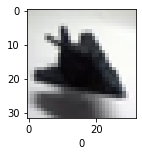

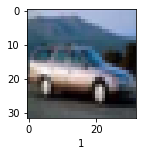

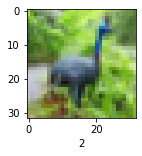

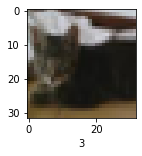

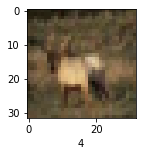

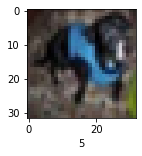

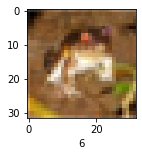

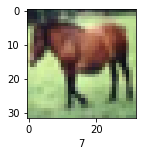

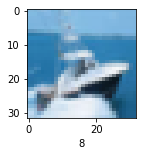

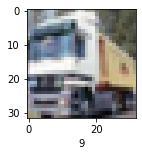

In [73]:
#finding out the labels to assign to the values of y_train
import array
Y=[0,0,0,0,0,0,0,0,0,0]
p=array.array("i", y_train)
for k in unique_y_train:
    Y[k]= p.index(k)
    print(Y[k])
    plot_sample(x_train, y_train, Y[k])

In [74]:
#we create this list to get the label of the image 
classes= ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]


In [17]:
def plot_sample(x, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])


0


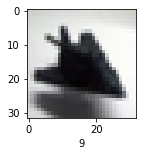

In [70]:
plot_sample(x_train, y_train, 29)
print(y_train[29])

In [20]:
#NORMALIZE the data
x_train= x_train/255
x_test= x_test/255

Simple artificial NN implementation

In [35]:
#simple artificial NN 
# to see how it performs and then we'll see 
ann = models.Sequential([layers.Flatten(input_shape=(32, 32, 3)),
                         layers.Dense(3000, activation= 'relu'), 
                         layers.Dense(1000, activation='relu'),
                         layers.Dense(10, activation='sigmoid')])
ann.compile(optimizer='SGD', loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
ann.fit(x_train, y_train, epochs=10)
# for y=[0000000100] (for y=8) means it is loss='categorical_crossentropy'
# directly (for y=8) y=8 means it is loss='sparse_categorical_crossentropy'
ann.evaluate(x_test, y_test)
y_pred1= ann.predict(x_test)
y_pred_classes1 = [np.argmax(element) for element in y_pred1]
print("Classification Report: \n", classification_report (y_test, y_pred_classes1))
acc1=metrics.accuracy_score(y_test, y_pred_classes1)
print("Accuracy =", 100*acc1)

Epoch 1/10
313/313 [==============================] - 22s 68ms/step - loss: 2.0013 - accuracy: 0.2721
Epoch 2/10
313/313 [==============================] - 22s 69ms/step - loss: 1.8110 - accuracy: 0.3495
Epoch 3/10
313/313 [==============================] - 21s 69ms/step - loss: 1.7316 - accuracy: 0.3849
Epoch 4/10
313/313 [==============================] - 21s 68ms/step - loss: 1.6670 - accuracy: 0.4090
Epoch 5/10
313/313 [==============================] - 22s 69ms/step - loss: 1.6179 - accuracy: 0.4299
Epoch 6/10
313/313 [==============================] - 22s 69ms/step - loss: 1.5806 - accuracy: 0.4453
Epoch 7/10
313/313 [==============================] - 21s 68ms/step - loss: 1.5431 - accuracy: 0.4592
Epoch 8/10
313/313 [==============================] - 21s 69ms/step - loss: 1.5109 - accuracy: 0.4670
Epoch 9/10
313/313 [==============================] - 22s 69ms/step - loss: 1.4775 - accuracy: 0.4806
Epoch 10/10
16/16 [==============================] - 1s 28ms/step - loss: 1.6794 -

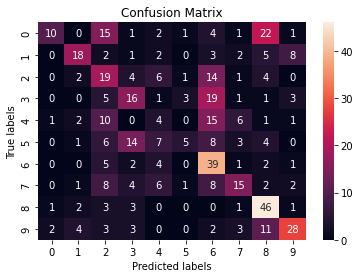

In [36]:
import seaborn as sns

#confusion matrix
#from sklearn.metrics import confusion_matrix
ax=plt.subplot()
cm1= confusion_matrix(y_test, y_pred_classes1)
sns.heatmap(cm1, annot=True, ax=ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');


In [75]:
#printing the number of correct predictions in all the labels
i=0
while i<10:
    print(cm1[i][i] )
    i+=1

10
18
19
16
4
5
39
15
46
28


CNN to improve performance

In [38]:
cnn= models.Sequential([
                        layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)),
                        layers.MaxPooling2D((2,2)),
                        layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)),
                        layers.MaxPooling2D((2,2)),
                        
                        layers.Flatten(),
                        layers.Dense(64, activation= 'relu'), 
                        layers.Dense(10, activation='softmax')
                     ])
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

cnn.fit(x_train, y_train, epochs=10)
cnn.evaluate(x_test, y_test, 1)
y_test=y_test.reshape(-1,)
y_pred2=cnn.predict(x_test)
np.argmax(y_pred2[0])
y_pred_classes2= [np.argmax(element) for element in y_pred2]
acc2=metrics.accuracy_score(y_test, y_pred_classes2)
print("Accuracy ", 100*acc2)

Epoch 1/10
313/313 [==============================] - 11s 33ms/step - loss: 1.8479 - accuracy: 0.3202
Epoch 2/10
313/313 [==============================] - 10s 33ms/step - loss: 1.4802 - accuracy: 0.4710
Epoch 3/10
313/313 [==============================] - 10s 32ms/step - loss: 1.3313 - accuracy: 0.5217
Epoch 4/10
313/313 [==============================] - 10s 32ms/step - loss: 1.2417 - accuracy: 0.5598
Epoch 5/10
313/313 [==============================] - 10s 33ms/step - loss: 1.1643 - accuracy: 0.5855
Epoch 6/10
313/313 [==============================] - 10s 32ms/step - loss: 1.0843 - accuracy: 0.6163
Epoch 7/10
313/313 [==============================] - 10s 32ms/step - loss: 1.0219 - accuracy: 0.6402
Epoch 8/10
313/313 [==============================] - 10s 32ms/step - loss: 0.9596 - accuracy: 0.6584
Epoch 9/10
313/313 [==============================] - 10s 32ms/step - loss: 0.9044 - accuracy: 0.6812
Epoch 10/10
500/500 [==============================] - 1s 2ms/step - loss: 1.2456 

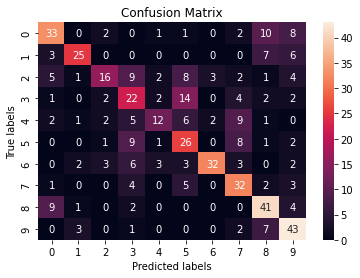

In [76]:
import seaborn as sns
ax=plt.subplot()
cm2= confusion_matrix(y_test, y_pred_classes2)
sns.heatmap(cm2, annot=True, ax=ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');


In [45]:
i=0
sum1=0
sum2=0
while i<10:
    print(cm1[i][i], "  :  ", cm2[i][i] )
    sum1+=cm1[i][i]
    sum2+=cm2[i][i]
    i+=1
print("Total no of accurately predicted images by ann vs cnn= ", sum1, " : ", sum2)
print("Accuracy of ann vs cnn= ", 100*acc1, " : ", 100*acc2)


10   :   33
18   :   25
19   :   16
16   :   22
4   :   12
5   :   26
39   :   32
15   :   32
46   :   41
28   :   43
Total no of accurately predicted images by ann vs cnn=  200  :  282
Accuracy of ann vs cnn=  40.0  :  56.39999999999999


Variations in CNN


In [79]:
krnl_size=[(3,3), (5,5), (7,7)]
filtersize=['64','128','256']
optimizer= ['adam', 'SGD', 'RMSprop', 'Adadelta', 'Adagrad' ]
dilationrate=[(2,2)]
#batch normalization
groupsize=[1,2]
#group normalization
#l2 regularization

In [80]:
# 1] Different kernel sizes
krnl_size=[(3,3), (5,5), (7,7)]
c=0
accur1=[]
for i in krnl_size:
        cnn= models.Sequential([
                                layers.Conv2D(filters=32, kernel_size=i, activation='relu', input_shape=(32, 32, 3)),
                                layers.MaxPooling2D((2,2)),
                                layers.Conv2D(filters=32, kernel_size=i, activation='relu', input_shape=(32, 32, 3)),
                                layers.MaxPooling2D((2,2)),
                                
                                layers.Flatten(),
                                layers.Dense(64, activation= 'relu'), 
                                layers.Dense(10, activation='softmax')
                            ])
        cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

        cnn.fit(x_train, y_train, epochs=10)
        cnn.evaluate(x_test, y_test, 1)
        y_test=y_test.reshape(-1,)
        y_pred=cnn.predict(x_test)
        np.argmax(y_pred[0])
        y_pred_classes= [np.argmax(element) for element in y_pred]
        accur1.append(0)
        acc1=metrics.accuracy_score(y_test, y_pred_classes)
        accur1[c]=acc1*100
        c+=1

for j in range(c):

        print("Accuracy when kernel size is ", krnl_size[j] , "= " , accur1[j])

Epoch 1/10
313/313 [==============================] - 11s 34ms/step - loss: 3.1230 - accuracy: 0.1829
Epoch 2/10
313/313 [==============================] - 11s 35ms/step - loss: 1.8603 - accuracy: 0.3178
Epoch 3/10
313/313 [==============================] - 10s 32ms/step - loss: 1.6482 - accuracy: 0.3969
Epoch 4/10
313/313 [==============================] - 10s 32ms/step - loss: 1.4989 - accuracy: 0.4551
Epoch 5/10
313/313 [==============================] - 10s 32ms/step - loss: 1.3431 - accuracy: 0.5129
Epoch 6/10
313/313 [==============================] - 10s 32ms/step - loss: 1.2390 - accuracy: 0.5570
Epoch 7/10
313/313 [==============================] - 10s 32ms/step - loss: 1.1139 - accuracy: 0.6003
Epoch 8/10
313/313 [==============================] - 10s 32ms/step - loss: 0.9828 - accuracy: 0.6482
Epoch 9/10
313/313 [==============================] - 10s 32ms/step - loss: 0.8956 - accuracy: 0.6746
Epoch 10/10
500/500 [==============================] - 1s 2ms/step - loss: 1.9389 

3

In [ ]:
# 2] different filters
filtersize=[32,64,128,256]
#
c=0
accur2=[]
for i in filtersize:
        cnn= models.Sequential([
                                layers.Conv2D(filters=i, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)),
                                layers.MaxPooling2D((2,2)),
                                layers.Conv2D(filters=i, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)),
                                layers.MaxPooling2D((2,2)),
                                
                                layers.Flatten(),
                                layers.Dense(64, activation= 'relu'), 
                                layers.Dense(10, activation='softmax')
                            ])
        cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

        cnn.fit(x_train, y_train, epochs=10)
        cnn.evaluate(x_test, y_test, 1)
        y_test=y_test.reshape(-1,)
        y_pred=cnn.predict(x_test)
        np.argmax(y_pred[0])
        y_pred_classes= [np.argmax(element) for element in y_pred]
        accur2.append(0)
        acc2=metrics.accuracy_score(y_test, y_pred_classes)
        accur2[c]=acc2*100
        c+=1

# different filters
for j in range(c):

        print("Accuracy when filter size is ", filtersize[j] , "= " , accur2[j])       

SGD


In [ ]:
# different optimizers

optmzr= ['adam', 'SGD', 'RMSprop', 'Adadelta', 'Adagrad' ]
c=0
accur4=[]
for i in range(len(optmzr)):
        cnn= models.Sequential([
                                layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)),
                                layers.MaxPooling2D((2,2)),
                                layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)),
                                layers.MaxPooling2D((2,2)),
                                layers.Flatten(),
                                layers.Dense(64, activation= 'relu'), 
                                layers.Dense(10, activation='softmax')
                            ])
        cnn.compile(optimizer=optmzr[i], loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

        cnn.fit(x_train, y_train, epochs=10)
        cnn.evaluate(x_test, y_test, 1)
        y_test=y_test.reshape(-1,)
        y_pred=cnn.predict(x_test)
        np.argmax(y_pred[0])
        y_pred_classes= [np.argmax(element) for element in y_pred]
        accur4.append(0)
        acc4=metrics.accuracy_score(y_test, y_pred_classes)
        accur4[c]=acc4*100
        c+=1
for j in range(c):

        print("Accuracy when optimizer is ", optmzr[j] , "= " , accur4[j])

In [ ]:
#for diff dilation rate
dilationrate=[(1,1), (2,2)]
c=0
accur5=[]
for i in dilationrate:
        cnn= models.Sequential([
                                layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3), dilation_rate=i),
                                layers.MaxPooling2D((2,2)),
                                layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3), dilation_rate=i),
                                layers.MaxPooling2D((2,2)),
                                layers.Flatten(),
                                layers.Dense(64, activation= 'relu'), 
                                layers.Dense(10, activation='softmax')
                            ])
        cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

        cnn.fit(x_train, y_train, epochs=10)
        cnn.evaluate(x_test, y_test, 1)
        y_test=y_test.reshape(-1,)
        y_pred=cnn.predict(x_test)
        np.argmax(y_pred[0])
        y_pred_classes= [np.argmax(element) for element in y_pred]
        accur5.append(0)
        acc5=metrics.accuracy_score(y_test, y_pred_classes)
        accur5[c]=acc5*100
        c+=1

for j in range(c):

        print("Accuracy when dilation rate is ", dilationrate[j] , "= " , accur5[j])

In [ ]:
# different grouping
groupby= [1, 2]
c=0
accur6=[]
for i in groupby:
        cnn= models.Sequential([
                                layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3), groups=i),
                                layers.MaxPooling2D((2,2)),
                                layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3), groups=i),
                                layers.MaxPooling2D((2,2)),
                                layers.Flatten(),
                                layers.Dense(64, activation= 'relu'), 
                                layers.Dense(10, activation='softmax')
                            ])
        cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

        cnn.fit(x_train, y_train, epochs=10)
        cnn.evaluate(x_test, y_test, 1)
        y_test=y_test.reshape(-1,)
        y_pred=cnn.predict(x_test)
        np.argmax(y_pred[0])
        y_pred_classes= [np.argmax(element) for element in y_pred]
        accur6.append(0)
        acc6=metrics.accuracy_score(y_test, y_pred_classes)
        accur6[c]=acc6*100
        c+=1


In [ ]:
        #batchnorm after each layer        
        c=0
        accur3=[]
        
        cnn= models.Sequential([
                                layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)),
                                layers.BatchNormalization(),
                                layers.MaxPooling2D((2,2)),
                                layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)),
                                layers.BatchNormalization(),
                                layers.MaxPooling2D((2,2)),
                                layers.Flatten(),
                                layers.Dense(64, activation= 'relu'),
                                layers.Dense(10, activation='softmax')
                                
                            ])
       
        cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

        cnn.fit(x_train, y_train, epochs=10)
        cnn.evaluate(x_test, y_test, 1)
        y_test=y_test.reshape(-1,)
        y_pred=cnn.predict(x_test)
        np.argmax(y_pred[0])
        y_pred_classes= [np.argmax(element) for element in y_pred]
        accur3.append(0)
        acc3=metrics.accuracy_score(y_test, y_pred_classes)
        accur3[c]=acc3*100
        c+=1  

        
        #batchnorm at the last layer
        
        cnn= models.Sequential([
                                layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)),
                                layers.MaxPooling2D((2,2)),
                                layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)),
                                layers.MaxPooling2D((2,2)),
                                layers.Flatten(),
                                layers.Dense(64, activation= 'relu'), 
                                layers.BatchNormalization(),
                                layers.Dense(10, activation='softmax')
                                
                            ])
        cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

        cnn.fit(x_train, y_train, epochs=10)
        cnn.evaluate(x_test, y_test, 1)
        y_test=y_test.reshape(-1,)
        y_pred=cnn.predict(x_test)
        np.argmax(y_pred[0])
        y_pred_classes= [np.argmax(element) for element in y_pred]
        accur3.append(0)
        acc3=metrics.accuracy_score(y_test, y_pred_classes)
        accur3[c]=acc3*100
        c+=1  
        for j in range(c):

              print("Accuracy = " , accur3[j])

In [ ]:
'''
#batchnorm after each layer
Accuracy after each maxpool layer= 10.4
Accuracy after each conv2D layer= 10.0
#batchnorm at the last layer     
layers.Dense(10, activation='softmax')
Accuracy =  7.6
layers.MaxPooling2D((2,2)),
Accuracy =  21.6
layers.Flatten(),
Accuracy =  28.4
layers.Dense(64, activation= 'relu'),
Accuracy =  34.0
first convo2d layer
Accuracy =  22.400000000000002
2nd convo 2d layer
Accuracy =  31.6'''

In [ ]:
        #l2 regularization
        c=0
        accur7=[]
        # without regularizer
        cnn= models.Sequential([
                                layers.Conv2D(filters=32, kernel_size=i, activation='relu', input_shape=(32, 32, 3)),
                                layers.MaxPooling2D((2,2)),
                                layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)),
                                layers.MaxPooling2D((2,2)),
                                layers.Flatten(),
                                layers.Dense(64, activation= 'relu'), 
                                layers.Dense(10, activation='softmax')
                            ])
        cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

        cnn.fit(x_train, y_train, epochs=10)
        cnn.evaluate(x_test, y_test, 1)
        y_test=y_test.reshape(-1,)
        y_pred=cnn.predict(x_test)
        np.argmax(y_pred[0])
        y_pred_classes= [np.argmax(element) for element in y_pred]
        accur7.append(0)
        acc7=metrics.accuracy_score(y_test, y_pred_classes)
        accur7[c]=acc7*100
        c+=1

        #with l2 regularizer
        cnn= models.Sequential([
                                layers.Conv2D(filters=32, kernel_size=i, activation='relu', input_shape=(32, 32, 3)),
                                layers.MaxPooling2D((2,2)),
                                layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)),
                                layers.MaxPooling2D((2,2)),
                                layers.Flatten(),
                                layers.Dense(64,kernel_regularizer='l2' , activation= 'relu'), 
                                layers.Dense(10, activation='softmax')
                            ])
        cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

        cnn.fit(x_train, y_train, epochs=10)
        cnn.evaluate(x_test, y_test, 1)
        y_test=y_test.reshape(-1,)
        y_pred=cnn.predict(x_test)
        np.argmax(y_pred[0])
        y_pred_classes= [np.argmax(element) for element in y_pred]
        accur7.append(0)
        acc7=metrics.accuracy_score(y_test, y_pred_classes)
        accur7[c]=acc7*100
        c+=1

        for j in range(c):

              print("Accuracy is = " , accur7[j])

In [ ]:
        #group normalization
        c=0
        accur8=[]
        # without normalization
        
        cnn= models.Sequential([
                                layers.Conv2D(filters=32, kernel_size=i, activation='relu', input_shape=(32, 32, 3)),
                                layers.MaxPooling2D((2,2)),
                                layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)),
                                layers.MaxPooling2D((2,2)),
                                layers.Flatten(),
                                layers.Dense(64, activation= 'relu'), 
                                layers.Dense(10, activation='softmax')
                            ])
        cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

        cnn.fit(x_train, y_train, epochs=10)
        cnn.evaluate(x_test, y_test, 1)
        y_test=y_test.reshape(-1,)
        y_pred=cnn.predict(x_test)
        np.argmax(y_pred[0])
        y_pred_classes= [np.argmax(element) for element in y_pred]
        accur8.append(0)
        acc8=metrics.accuracy_score(y_test, y_pred_classes)
        accur8[c]=acc8*100
        c+=1

        
        #batch normalization
        cnn= models.Sequential([
                                layers.Conv2D(filters=32, kernel_size=i, activation='relu', input_shape=(32, 32, 3)),
                                layers.MaxPooling2D((2,2)),
                                layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)),
                                layers.MaxPooling2D((2,2)),
                                layers.Flatten(),
                                layers.Dense(64, activation= 'relu'), 
                                layers.BatchNormalization(),
                                layers.Dense(10, activation='softmax')
                            ])
        cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

        cnn.fit(x_train, y_train, epochs=10)
        cnn.evaluate(x_test, y_test, 1)
        y_test=y_test.reshape(-1,)
        y_pred=cnn.predict(x_test)
        np.argmax(y_pred[0])
        y_pred_classes= [np.argmax(element) for element in y_pred]
        accur8.append(0)
        acc8=metrics.accuracy_score(y_test, y_pred_classes)
        accur8[c]=acc8*100
        c+=1

              
        #group normalization
        cnn= models.Sequential([
                                layers.Conv2D(filters=32, kernel_size=i, activation='relu', input_shape=(32, 32, 3)),
                                layers.MaxPooling2D((2,2)),
                                layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)),
                                layers.MaxPooling2D((2,2)),
                                tfa.layers.GroupNormalization(groups=32, axis= 3),
                                layers.Flatten(),
                                layers.Dense(64, activation= 'relu'), 
                                layers.Dense(10, activation='softmax')
                            ])
        cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

        cnn.fit(x_train, y_train, epochs=10)
        cnn.evaluate(x_test, y_test, 1)
        y_test=y_test.reshape(-1,)
        y_pred=cnn.predict(x_test)
        np.argmax(y_pred[0])
        y_pred_classes= [np.argmax(element) for element in y_pred]
        accur8.append(0)
        acc8=metrics.accuracy_score(y_test, y_pred_classes)
        accur8[c]=acc8*100
        c+=1

        for j in range(c):

                print("Accuracy is = " , accur8[j])

In [ ]:
'''
tfa.layers.GroupNormalization(groups=4)
Accuracy is =  27.200000000000003
tfa.layers.GroupNormalization(groups=8),
Accuracy is =  32.4
tfa.layers.GroupNormalization(groups=16)
Accuracy is =  32.800000000000004
tfa.layers.GroupNormalization(groups=32),
Accuracy is =  25.6

'''

In [ ]:
#SVM

In [63]:
x_train2=x_train[:5000]
x_train2=x_train2.reshape(5000, -1)
x_test2=x_test.reshape(250, -1)
y_train2=y_train[:5000]

In [64]:
print(x_train.shape)
print(type(x_train))
print(x_test.shape)
print(type(x_test))
print(x_train2.shape)
print(type(x_train2))
print(x_test2.shape)
print(type(x_test2))
print(y_train2.shape)
print(type(y_train2))
print(y_test.shape)
print(type(y_test))




(10000, 32, 32, 3)
<class 'numpy.ndarray'>
(250, 32, 32, 3)
<class 'numpy.ndarray'>
(5000, 3072)
<class 'numpy.ndarray'>
(250, 3072)
<class 'numpy.ndarray'>
(5000,)
<class 'numpy.ndarray'>
(250,)
<class 'numpy.ndarray'>


In [65]:
clf = SVC(kernel='rbf',C=1000,gamma=0.001)
clf = clf.fit(x_train2, y_train2)
y_pred = clf.predict(x_test2)
y_pred_classes= [np.argmax(element) for element in y_pred]
acc2=metrics.accuracy_score(y_test, y_pred_classes)
print("Accuracy ", 100*acc2)

Accuracy  10.0


In [ ]:
cm2= confusion_matrix(y_test, y_pred_classes)

while i<10:
    print(cm[i][i], "  :  ", cm2[i][i] )
    i+=1
